In [59]:
#Importing Necessary Libraries
import json
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS
import swifter



from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from pprint import pprint




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
#Changing default pandas settings
pd.options.display.width = 1000
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [61]:
# Opening JSON file
f = open("/content/drive/MyDrive/MS/Live/NLP/Ticket_Classification_Case_study/complaints-2021-05-14_08_16.json") # Write the path to your data file and load it

# returns JSON object as
# a dictionary
data = json.load(f)
df=pd.json_normalize(data)

#Data Preperation

In [62]:
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [64]:
df.rename(columns={'_source.complaint_what_happened':'complaints_what_happened'}, inplace=True)#Changing the column names of useful columns

In [65]:
df.columns#Checking all the column names after update

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code', '_source.complaint_id', '_source.issue', '_source.date_received', '_source.state', '_source.consumer_disputed', '_source.product', '_source.company_response', '_source.company', '_source.submitted_via', '_source.date_sent_to_company', '_source.company_public_response', '_source.sub_product', '_source.timely', 'complaints_what_happened', '_source.sub_issue', '_source.consumer_consent_provided'], dtype='object')

In [66]:
df = df[['complaints_what_happened']]#Extracting only the required column

In [67]:
df.columns

Index(['complaints_what_happened'], dtype='object')

In [68]:
df = df[df['complaints_what_happened'].astype(bool)]#Removing all the blank values from the data.
df

,complaints_what_happened
1,Good morning my name is XXXX XXXX and I apprec...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...
10,Chase Card was reported on XX/XX/2019. However...
11,"On XX/XX/2018, while trying to book a XXXX XX..."
14,my grand son give me check for {$1600.00} i de...
...,...
78303,After being a Chase Card customer for well ove...
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX..."
78310,I am not familiar with XXXX pay and did not un...
78311,I have had flawless credit for 30 yrs. I've ha...


#Preparing text for topic modelling

In [69]:
#Function to clean the text and remove all the unnecessary elements.
def clean_data(text):
    text = text.lower() # text to lowercase
    text = re.sub(r'\s\{\$\S*\}', '',text) # Remove text within curly braces
    text = re.sub(r'\(\w*\)', '', text) #remove text within braces
    text = re.sub(r'(\W\s)|(\W$)|(\W\d*)', ' ',text) # Remove punctuation
    text = re.sub(r'\d+\s', '', text) #Remove other numerical values
    text = re.sub("\[.*?\]","", text) #Remove text within square braces
    return text

In [70]:
# Apply data cleaning to the complaints_what_happened column

df['complaints'] = df['complaints_what_happened'].apply(clean_data)
df.head()

,complaints_what_happened,complaints
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in xx xx and was...
10,Chase Card was reported on XX/XX/2019. However...,chase card was reported on xx xx however frau...
11,"On XX/XX/2018, while trying to book a XXXX XX...",on xx xx while trying to book a xxxx xxxx tic...
14,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...


In [71]:
# Function to Lemmatize the texts
def lemmatization(text):
    tokens = word_tokenize(text)
    wordnet_lemmetizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmetizer.lemmatize(token) for token in tokens]
    lemmatized_str = " ".join(lemmatized)
    return lemmatized_str

In [72]:
#Createing a dataframe('df_clean') that will have only the complaints and the lemmatized complaints
df_clean = pd.DataFrame({'complaints':df['complaints'], 'lemmatized':df['complaints'].apply(lemmatization)})


In [73]:
df_clean.head()

,complaints,lemmatized
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...
2,i upgraded my xxxx xxxx card in xx xx and was...,i upgraded my xxxx xxxx card in xx xx and wa t...
10,chase card was reported on xx xx however frau...,chase card wa reported on xx xx however fraudu...
11,on xx xx while trying to book a xxxx xxxx tic...,on xx xx while trying to book a xxxx xxxx tick...
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...


In [74]:
#Function to extract the POS tags

def get_pos_tags(text):
    nn_words = []
    doc = nlp(text)
    for tok in doc:
        if(tok.tag_ == 'NN'):
            nn_words.append(tok.lemma_)
    nn_words_str = " ".join(nn_words)
    return nn_words_str

In [75]:
#this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].
df_clean["complaint_POS_removed"] =  df_clean.swifter.apply(lambda x: get_pos_tags(x['lemmatized']), axis=1)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [76]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaints,lemmatized,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name stop bank service debt verificati...
2,i upgraded my xxxx xxxx card in xx xx and was...,i upgraded my xxxx xxxx card in xx xx and wa t...,xxxx card agent anniversary date agent informa...
10,chase card was reported on xx xx however frau...,chase card wa reported on xx xx however fraudu...,card application identity consent service cred...
11,on xx xx while trying to book a xxxx xxxx tic...,on xx xx while trying to book a xxxx xxxx tick...,xxxx ticket offer ticket reward card informati...
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...
...,...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade solicitation credit...
78309,on wednesday xx xx xxxx i called chas my xxxx ...,on wednesday xx xx xxxx i called chas my xxxx ...,xxxx credit card provider claim purchase prote...
78310,i am not familiar with xxxx pay and did not un...,i am not familiar with xxxx pay and did not un...,xxxx pay risk consumer chase bank app chase ye...
78311,i have had flawless credit for yrs i ve had c...,i have had flawless credit for yr i ve had cha...,credit chase credit card chase freedom problem...


Text(0.5, 0, 'Complaint character length')

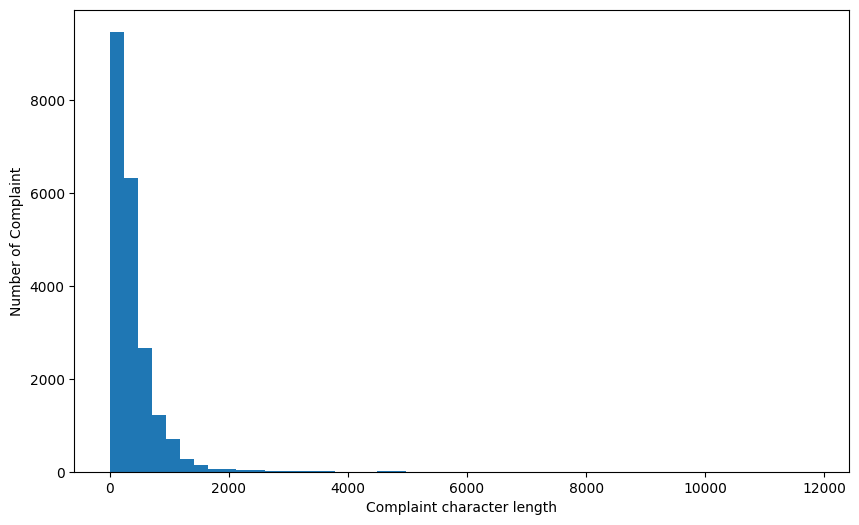

In [114]:
# Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.complaint_POS_removed]
plt.hist(doc_lens, bins = 50)
plt.ylabel('Number of Complaint')
plt.xlabel('Complaint character length')


#Observation
#Most of the complaints have character length less than 500.
#Very few complaints are in detailed form.

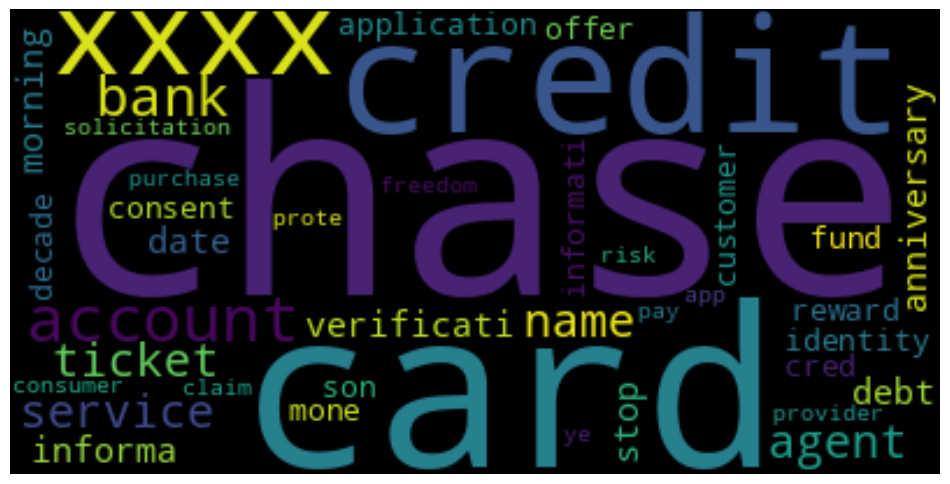

In [78]:
# Top 40 words frequency wise wordcloud
wordcloud = WordCloud(max_words=40, random_state=1, stopwords=set(STOPWORDS))
wordcloud.generate(str(df_clean['complaint_POS_removed']))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Observation
#The words occuring most no. of times are chase, credit, card, account, bank.

In [79]:
 #Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')
df_clean

,complaints,lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name stop bank service debt verificati...,morning name stop bank service debt verificati...
2,i upgraded my xxxx xxxx card in xx xx and was...,i upgraded my xxxx xxxx card in xx xx and wa t...,xxxx card agent anniversary date agent informa...,xxxx card agent anniversary date agent informa...
10,chase card was reported on xx xx however frau...,chase card wa reported on xx xx however fraudu...,card application identity consent service cred...,card application identity consent service cred...
11,on xx xx while trying to book a xxxx xxxx tic...,on xx xx while trying to book a xxxx xxxx tick...,xxxx ticket offer ticket reward card informati...,xxxx ticket offer ticket reward card informati...
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...
...,...,...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...
78309,on wednesday xx xx xxxx i called chas my xxxx ...,on wednesday xx xx xxxx i called chas my xxxx ...,xxxx credit card provider claim purchase prote...,xxxx credit card provider claim purchase prote...
78310,i am not familiar with xxxx pay and did not un...,i am not familiar with xxxx pay and did not un...,xxxx pay risk consumer chase bank app chase ye...,xxxx pay risk consumer chase bank app chase ye...
78311,i have had flawless credit for yrs i ve had c...,i have had flawless credit for yr i ve had cha...,credit chase credit card chase freedom problem...,credit chase credit card chase freedom problem...


In [80]:
#Function to find gram frequencies in the cleaned dataframe.
def top_grams(grams):
    x=grams
    c_vec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(grams,grams))
    grams = c_vec.fit_transform(df_clean['complaints'])
    count_values = grams.toarray().sum(axis=0)
    vocab = c_vec.vocabulary_
    if x == 1:
      df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'unigram'})
    elif x == 2:
      df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'bigram'})
    elif x == 3:
      df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'trigram'})
    return df_ngram


In [81]:
df_unigram = top_grams(1)#Finding unigram frequencies.
df_unigram.head(10)

,frequency,unigram
0,228950,xxxx
1,80804,chase
2,77018,xx
3,42747,account
4,32807,credit
5,26942,card
6,26760,bank
7,20364,would
8,16383,told
9,14122,payment


In [82]:
df_bigram = top_grams(2) #Finding bigram frequencies.
df_bigram.head(10)

,frequency,bigram
0,90077,xxxx xxxx
1,38592,xx xx
2,29235,xx xxxx
3,12708,chase bank
4,10938,credit card
5,6231,xxxx xx
6,5120,xxxx chase
7,3661,called chase
8,3568,checking account
9,3247,credit report


In [83]:
df_trigram = top_grams(3)#Finding trigram frequencies.
df_trigram.head(10)

,frequency,trigram
0,42376,xxxx xxxx xxxx
1,28813,xx xx xxxx
2,6224,xxxx xx xx
3,3333,xx xxxx xxxx
4,2718,xx xxxx xx
5,2229,jp morgan chase
6,1822,chase credit card
7,1735,xxxx xxxx xx
8,1727,xxxx xxxx chase
9,1271,xx xxxx chase


In [84]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')#Removing the masked information in the complaints.

In [85]:
#All masked texts has been removed
df_clean.head()

,complaints,lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name stop bank service debt verificati...,morning name stop bank service debt verificati...
2,i upgraded my xxxx xxxx card in xx xx and was...,i upgraded my xxxx xxxx card in xx xx and wa t...,xxxx card agent anniversary date agent informa...,card agent anniversary date agent information...
10,chase card was reported on xx xx however frau...,chase card wa reported on xx xx however fraudu...,card application identity consent service cred...,card application identity consent service cred...
11,on xx xx while trying to book a xxxx xxxx tic...,on xx xx while trying to book a xxxx xxxx tick...,xxxx ticket offer ticket reward card informati...,ticket offer ticket reward card information o...
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...


#Feature Extraction

In [86]:
 #initialise the TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [87]:
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])#Creating document term matrix

In [88]:
pd.DataFrame(dtm.toarray(),columns = tfidf.get_feature_names_out())#Converting the tfidf matrix to a dataframe.

,1692section,1st,2nd,3rd,aa,aaa,aarp,abandonment,abatement,abbreviation,abide,ability,absence,absurdity,abundance,abuse,abuser,ac,acc,acccount,acceleration,accent,accept,acceptance,access,accessibility,accessory,accident,accommodation,accomplice,accont,accord,accordance,accou,accouint,accoun,account,accountability,accountant,accountholder,accounting,accout,accrual,acct,accumulate,accumulation,accunt,accuracy,accurateness,accusation,ach,acion,acivity,ack,acknowledge,acknowledgement,acknowledging,acknowledgment,acnt,acocunt,acoount,acount,acquaintance,acquiesce,acquisition,acre,acreage,acronym,act,acting,action,activate,activation,activity,actor,actuality,ad,add,addendum,addict,addition,additional,address,addressee,adequacy,adherence,adhesion,adjudication,adjuster,adjustment,adjustor,admin,administration,administrator,admission,admittance,adoption,adress,adult,adv,advance,advancement,advantage,advent,advertise,advertisement,advertiser,advertising,advertisment,advice,advise,advisement,adviser,advisor,advisory,advocacy,advocate,aes,aff,affadavit,affair,affect,affiant,affidavit,affiliate,affiliation,affirmation,affirmative,affordability,aftermath,afternoon,againt,age,agence,agency,agenda,agent,aggravation,aggreement,aggregate,aggression,agian,agility,agony,agreement,agriculture,ai,aid,ailment,aim,air,aircraft,airfare,airline,airplane,airport,airway,ala,alarm,alaska,alcohol,ale,alert,alibi,alien,align,alignment,alimony,alittle,allegation,allege,alliance,alll,allocation,allonge,allot,allotment,allowance,allusion,ally,alot,alteration,altercation,altered,alternative,altitude,amazement,amazon,ambiguity,ambulance,ambush,amend,amendment,amenity,american,amex,ammount,amortization,amounting,amout,amoutn,amplifier,amputation,amt,amusement,analogy,analysis,analyst,ance,anf,angel,anger,angle,anguish,animal,annex,anniversary,announcement,annoyance,annual,annuity,answer,answering,antedate,anticipation,antivirus,anxiety,anybody,anytime,apartment,apology,app,apparel,appeal,appear,appearance,apple,appliance,applicability,applicable,applicant,application,appliction,apply,applying,appointment,appox,appraisal,appraiser,appreciation,...,vandalism,vantage,variable,variance,variant,variation,variety,vat,vault,vechile,vehicle,vein,vender,vendetta,vendor,vent,venture,venue,ver,veracity,verbage,verbiage,verdict,verfication,verge,verifiability,verification,verified,verify,verifying,verse,version,vessel,vet,veteran,veterinarian,vetting,vi,viability,vice,vicinity,victim,victor,video,videographer,videophone,videotape,view,viewing,viewpoint,vii,village,vin,violating,violation,violence,vip,virtue,virus,visa,visibility,vision,visit,visitor,visor,visual,vitamin,vm,vmail,voice,voicemail,void,voip,volume,volunteer,vote,vouch,voucher,vp,vrap,vulnerability,wa,wad,wage,wager,waif,waist,wait,waiter,waiting,waitress,waive,waiver,waiving,wake,walk,walker,walkthrough,wall,wallet,wamu,wand,want,wanton,war,ward,warehouse,warning,warrant,warranty,wash,washer,washing,wasn,waste,wasxx,watch,watchdog,water,wave,way,wayside,weakness,wealth,weapon,wear,weather,web,weblink,webpage,website,wedding,wednesday,week,weekday,weekend,weekly,weight,welcome,welfare,wellbeing,wellness,wer,wesbite,wether,whack,whammy,whatsoever,whe,wheel,wheelchair,whereabouts,whim,whirlwind,whistle,whistleblower,whit,whitout,wholesaler,whomever,whopping,wich,widow,widower,wierd,wife,wifi,wig,wildfire,willingness,win,wind,windfall,window,windshield,wine,winter,wire,wireless,wiring,wisconsin,wish,wit,witch,withdraw,withdrawal,withdrawing,withdrawl,wither,withholding,withi,withstanding,witness,woe,woman,wonder,wood,word,wording,work,workday,worker,workforce,working,workmanship,workout,workplace,worksheet,workshop,world,worng,worry,worth,worthiness,worthlessness,wound,wrangler,wrap,wreck,wright,wrist,wristband,writ,write,writen,writer,writing,wrong,wrongdoing,www,xx,xxx,yard,yea,year,yelp,yes,yesterday,yhe,yield,yment,yoga,youth,yr,ytd,zilch,zip,zipcode,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

#Topic Modelling using NMF

In [89]:
from sklearn.decomposition import NMF

In [90]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(random_state=40, n_components=num_topics)

In [91]:

nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

5711

In [92]:
#Print the Top15 words for each of the topics
words = np.array(tfidf.get_feature_names_out())
topic_words_df = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)

for i in range(num_topics):
    ix = nmf_model.components_[i].argsort()[::-1][:15]
    topic_words_df.iloc[i] = words[ix]

topic_words_df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,check,bank,money,fund,chase,deposit,branch,day,fee,checking,business,number,transaction,customer
Topic 2,card,credit,chase,balance,account,fee,limit,score,year,month,purchase,point,offer,time,service
Topic 3,payment,loan,mortgage,chase,month,home,modification,time,year,rate,balance,property,fee,statement,day
Topic 4,inquiry,report,credit,company,information,bureau,reporting,debt,identity,score,theft,account,letter,application,creditor
Topic 5,charge,chase,transaction,dispute,claim,fraud,merchant,letter,email,service,information,company,phone,time,day


In [93]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_results = nmf_model.transform(dtm)
topic_results.argmax(axis=1)

array([0, 1, 1, ..., 4, 1, 2])

In [94]:
#Assign the best topic to each of the cmplaints in Topic Column

df_clean['Topic'] = topic_results.argmax(axis=1)

In [95]:
df_clean.head()

,complaints,lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name stop bank service debt verificati...,morning name stop bank service debt verificati...,0
2,i upgraded my xxxx xxxx card in xx xx and was...,i upgraded my xxxx xxxx card in xx xx and wa t...,xxxx card agent anniversary date agent informa...,card agent anniversary date agent information...,1
10,chase card was reported on xx xx however frau...,chase card wa reported on xx xx however fraudu...,card application identity consent service cred...,card application identity consent service cred...,1
11,on xx xx while trying to book a xxxx xxxx tic...,on xx xx while trying to book a xxxx xxxx tick...,xxxx ticket offer ticket reward card informati...,ticket offer ticket reward card information o...,3
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0


In [96]:
# Print the first 5 Complaint for each of the Topics
First5_comp=df_clean.groupby('Topic').head(5)
First5_comp.sort_values('Topic')

,complaints,lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name stop bank service debt verificati...,morning name stop bank service debt verificati...,0
24,mishandling of this account by chase auto and ...,mishandling of this account by chase auto and ...,account chase auto xxxx,account chase auto,0
17,with out notice j p morgan chase restricted my...,with out notice j p morgan chase restricted my...,notice account debit card branch customer serv...,notice account debit card branch customer serv...,0
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0
27,i opened an account with chase bank on xxxx an...,i opened an account with chase bank on xxxx an...,account bank code term everything account xxxx...,account bank code term everything account dep...,0
40,xxxx xxxx a sofa love seat table and chairs an...,xxxx xxxx a sofa love seat table and chair and...,sofa love seat table chair debit card bank vis...,sofa love seat table chair debit card bank vis...,1
10,chase card was reported on xx xx however frau...,chase card wa reported on xx xx however fraudu...,card application identity consent service cred...,card application identity consent service cred...,1
2,i upgraded my xxxx xxxx card in xx xx and was...,i upgraded my xxxx xxxx card in xx xx and wa t...,xxxx card agent anniversary date agent informa...,card agent anniversary date agent information...,1
32,my chase amazon card was declined for a cateri...,my chase amazon card wa declined for a caterin...,chase catering order brother funeral amount ch...,chase catering order brother funeral amount ch...,1
50,i am a senior citizen that has been scammed by...,i am a senior citizen that ha been scammed by ...,citizen company time share company nothing ref...,citizen company time share company nothing ref...,1


In [97]:
# Create the dictionary of Topic names and Topics
Topic_names = {0:'Account Services', 1:'Credit card or prepaid card', 2:'Mortgage/Loan', 3:'Others', 4:'Theft/Dispute Reporting'}

# Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [98]:
df_clean.head()

,complaints,lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name stop bank service debt verificati...,morning name stop bank service debt verificati...,Account Services
2,i upgraded my xxxx xxxx card in xx xx and was...,i upgraded my xxxx xxxx card in xx xx and wa t...,xxxx card agent anniversary date agent informa...,card agent anniversary date agent information...,Credit card or prepaid card
10,chase card was reported on xx xx however frau...,chase card wa reported on xx xx however fraudu...,card application identity consent service cred...,card application identity consent service cred...,Credit card or prepaid card
11,on xx xx while trying to book a xxxx xxxx tic...,on xx xx while trying to book a xxxx xxxx tick...,xxxx ticket offer ticket reward card informati...,ticket offer ticket reward card information o...,Others
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,Account Services


#Supervised model to predict any new complaints to the relevant Topics.

In [99]:
#Create the dictionary again of Topic names and Topics
Topic_names = {'Account Services':0, 'Others':3, 'Mortgage/Loan':2, 'Credit card or prepaid card':1, 'Theft/Dispute Reporting':4}

# Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [100]:
df_clean.head()

,complaints,lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name stop bank service debt verificati...,morning name stop bank service debt verificati...,0
2,i upgraded my xxxx xxxx card in xx xx and was...,i upgraded my xxxx xxxx card in xx xx and wa t...,xxxx card agent anniversary date agent informa...,card agent anniversary date agent information...,1
10,chase card was reported on xx xx however frau...,chase card wa reported on xx xx however fraudu...,card application identity consent service cred...,card application identity consent service cred...,1
11,on xx xx while trying to book a xxxx xxxx tic...,on xx xx while trying to book a xxxx xxxx tick...,xxxx ticket offer ticket reward card informati...,ticket offer ticket reward card information o...,3
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0


In [101]:
# Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean.drop(['lemmatized', 'complaint_POS_removed', 'Complaint_clean'], axis=1)

In [102]:
training_data.head()

,complaints,Topic
1,good morning my name is xxxx xxxx and i apprec...,0
2,i upgraded my xxxx xxxx card in xx xx and was...,1
10,chase card was reported on xx xx however frau...,1
11,on xx xx while trying to book a xxxx xxxx tic...,3
14,my grand son give me check for i deposit it in...,0


##Apply the supervised models on the training data created.

In [103]:
# Write your code to get the Vector count
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.complaints)

# Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [104]:
#Importing necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report


In [105]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.Topic, test_size=0.2, random_state=40)

In [106]:
# Logistic Regression
lr = LogisticRegression(max_iter = 1000,random_state=40)
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)

print(classification_report(y_true=y_test, y_pred=predicted))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1044
           1       0.94      0.91      0.92       825
           2       0.93      0.96      0.95      1031
           3       0.92      0.86      0.89       411
           4       0.88      0.88      0.88       904

    accuracy                           0.92      4215
   macro avg       0.92      0.91      0.91      4215
weighted avg       0.92      0.92      0.92      4215



The Logistic Regression is working nice with 92% accuracy and precision and recall of 92% and 95%.

In [107]:
# Decision tree classifier
dt = DecisionTreeClassifier(random_state=40).fit(X_train, y_train)
predicted = dt.predict(X_test)

print(classification_report(y_pred=predicted, y_true=y_test))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1044
           1       0.79      0.80      0.79       825
           2       0.83      0.84      0.83      1031
           3       0.76      0.74      0.75       411
           4       0.70      0.69      0.69       904

    accuracy                           0.78      4215
   macro avg       0.77      0.77      0.77      4215
weighted avg       0.78      0.78      0.78      4215



Decision tree is satisfactory with 78% accuracy and precision and recall of 78% and 80% respectively.

In [108]:
#Random Forest Classifier
rfc = RandomForestClassifier(max_depth=10,random_state=40)
rfc.fit(X_train, y_train)
predicted = rfc.predict(X_test)

print(classification_report(y_pred=predicted, y_true=y_test))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76      1044
           1       0.83      0.59      0.69       825
           2       0.75      0.93      0.83      1031
           3       0.98      0.31      0.47       411
           4       0.77      0.62      0.69       904

    accuracy                           0.73      4215
   macro avg       0.79      0.67      0.69      4215
weighted avg       0.77      0.73      0.72      4215



Random Forest Classifier is also satisfactory with 73% accuracy. The precision and recall values are not up to the mark.

#Infering the best model.

We can clearly see that Logistic Regression model working better than the other two. SO we go ahead with Logistic Regression model.

In [109]:
# Create a dataframe of some sample customer complaints
df_complaints = pd.DataFrame({'complaints': ["I can not get from chase who services my mortgage, who owns it and who has original loan docs",
                                  "The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.",
                                  "I want to open a salary account at your downtown branch. Please provide me the procedure.",
                                  "unwanted service activated and money deducted automatically ",
                                  "Where are the bank branches in the city of Patna?"]})
df_complaints

,complaints
0,I can not get from chase who services my mortg...
1,The bill amount of my credit card was debited ...
2,I want to open a salary account at your downto...
3,unwanted service activated and money deducted ...
4,Where are the bank branches in the city of Patna?


In [112]:
def predict_lr(text):
    Topic_names = {0:'Account Services', 3:'Others', 2:'Mortgage/Loan', 1:'Credit card or prepaid card', 4:'Theft/Dispute Reporting'}
    X_new_counts = count_vect.transform(text)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)
    predicted = lr.predict(X_new_tfidf)
    return Topic_names[predicted[0]]

In [113]:
df_complaints['tag'] = df_complaints['complaints'].apply(lambda x: predict_lr([x]))
df_complaints

,complaints,tag
0,I can not get from chase who services my mortg...,Mortgage/Loan
1,The bill amount of my credit card was debited ...,Credit card or prepaid card
2,I want to open a salary account at your downto...,Account Services
3,unwanted service activated and money deducted ...,Account Services
4,Where are the bank branches in the city of Patna?,Account Services


We can see that the model is able to classify correctly.

#Conclusion

As expected, the model is able to classify in all 5 classes.